## Problema a ser resolvido:

**Recebemos uma tarefa de uma empresa de grande porte**<br>
<br>
Ajudar na busca de compras de carros com o melhor custo-benefício possível e também fornecer insights para a equipe de marketing.

## Começando pelo webscraping dos carros

Comecei raspando um dos maiores sites de vendas de carros novos/usados do Brasil, o ICARROS.com.br<br>
E guardei os dados em um arquivo CSV

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [2]:
# ultima_pagina = int(soup.findAll('p', class_='label__neutral ids_textStyle_label_small_bold')[2].get_text().strip())
ultima_pagina = 145
pagina_com_erro = 100

In [3]:
dic_produtos = {'modelo': [], 'combustivel': [], 'preco': [], 'ano': [], 'km': [], 'cor': [],
                 'cambio': [], 'cidade': [], 'opcionais': []}

In [4]:
# for i in range(pagina_com_erro, ultima_pagina+1):
#     try:
#         url_pag = f'https://www.icarros.com.br/ache/listaanuncios.jsp?pag={i}&ord=35&sop=nta_17|44|51.1_-kmm_1.1_-esc_4.1_-sta_1.1_'
#         proxy = "http://0f08abb74589a300b995d14928d47f24ee690774:@proxy.zenrows.com:8001"
#         proxies = {"http": proxy, "https": proxy}
#         response = requests.get(url_pag, proxies=proxies, verify=False)
#         html = response.content.decode('utf-8')
#         soup = BeautifulSoup(html, 'html.parser')
#         produtos = soup.find_all('li', class_=('offer-card'))
    
#         for produto in produtos:
            
#             link_produto = produto.find('a', class_='offer-card__image-container')
#             if link_produto and 'href' in link_produto.attrs:
#                 href = link_produto['href']
                
#                 url_produto = f'https://www.icarros.com.br{href}'

#                 response_produto = requests.get(url_produto, proxies=proxies, verify=False)
#                 if response_produto.status_code == 200:
#                     html_produto = response_produto.text
#                     soup_produto = BeautifulSoup(html_produto, 'html.parser')

#                     # Cidade do Carro
#                     cidade = soup_produto.find('span', class_='link')
#                     cidade_final = cidade.find('a', title=True).text.strip()

#                     # Preço e Modelo
#                     modelo = soup_produto.find('h1', class_='titulo-sm').get_text().strip()
#                     preco = soup_produto.find('h2', class_='preco').get_text().strip()
#                     preco_correto = preco.replace('R$', '').replace(' ', '')

#                     # Informações gerais
#                     dados_do_carro = soup_produto.find_all('span', class_='destaque')
#                     combustivel = soup_produto.find('ul', class_='listavertical')
#                     combustivel_text = combustivel.find('p').text.strip()
#                     combustivel_final = combustivel_text.split(',')[0]
#                     ano = dados_do_carro[0].text.strip()
#                     ano_correto = ano[:4]  # Ano
#                     km = dados_do_carro[1].text.strip()  # KM
#                     cor = dados_do_carro[2].text.strip()  # Cor
#                     cambio = dados_do_carro[3].text.strip()  # Câmbio
#                     if cambio == 'manual':
#                         cambio = 0
#                     else:
#                         cambio = 1

#                     # Lista opcionais possíveis (Em construção)
#                     opcionais = soup_produto.find_all('p', class_='listaopcionais')
#                     todos_opcionais = ['airbag motorista', 'freios ABS', 'airbag passageiro',
#                                         'ar-condicionado', 'direção elétrica',
#                                         'volante com regulagem de altura', 'travas elétricas',
#                                         'cd player com MP3', 'entrada USB', 'vidros elétricos dianteiros',
#                                         'limajuste de alturap. traseiro', 'desemb. traseiro', 'alarme',
#                                         'câmbio automático', 'ajuste de altura',
#                                         'distribuição eletrônica de frenagem,',
#                                         'controle de tração', 'retrovisores elétricos',
#                                             'piloto automático', 'Kit Multimídia', 'bancos de couro',
#                                             'limp. traseiro'  ]

#                     valores_opcionais = {opcional: 0 for opcional in todos_opcionais}

#                     for p_element in opcionais:
                        
#                         texto_opcionais = p_element.get_text().strip()
                                            
#                         opcionais_individuais = [opc.strip() for opc in texto_opcionais.split(',')]
                                            
#                         for opcional in opcionais_individuais:
#                             if opcional in valores_opcionais:
#                                 valores_opcionais[opcional] = 1
                    
#                     dic_produtos['modelo'].append(modelo)
#                     dic_produtos['combustivel'].append(combustivel_final)
#                     dic_produtos['preco'].append(preco)
#                     dic_produtos['ano'].append(ano_correto)
#                     dic_produtos['km'].append(km)
#                     dic_produtos['cor'].append(cor)
#                     dic_produtos['cambio'].append(cambio)
#                     dic_produtos['cidade'].append(cidade_final)
#                     dic_produtos['opcionais'].append(valores_opcionais)

#                     print("Modelo:", modelo)
#                     print("Combustivel:", combustivel_final)
#                     print("Preço:", preco_correto)
#                     print("Ano:", ano_correto)
#                     print("KM:", km)
#                     print("Cor:", cor)
#                     print("Câmbio:", cambio)
#                     print("Cidade:", cidade_final)
#                     print("Opcionais", valores_opcionais)

#                     # tempo_aleatorio = random.randint(3, 20)
#                     # time.sleep(tempo_aleatorio)

#     except Exception as e:
#         print(f"Erro na raspagem da página {i}: {e}")
#         continue


               
# todos_opcionais = ['airbag motorista', 'freios ABS', 'airbag passageiro',
#                     'ar-condicionado', 'direção elétrica',
#                     'volante com regulagem de altura', 'travas elétricas',
#                     'cd player com MP3', 'entrada USB', 'vidros elétricos dianteiros',
#                     'limajuste de alturap. traseiro', 'desemb. traseiro', 'alarme',
#                     'câmbio automático', 'ajuste de altura',
#                     'distribuição eletrônica de frenagem,',
#                     'controle de tração', 'retrovisores elétricos',
#                         'piloto automático', 'Kit Multimídia', 'bancos de couro',
#                         'limp. traseiro'  ]

# df = pd.DataFrame(dic_produtos)
# for opcional in todos_opcionais:
#     df[opcional] = df['opcionais'].apply(lambda x: x.get(opcional, 0))
# df.drop('opcionais', axis=1, inplace=True)
# with open('/home/renato/Projetos_Python/Webscraping/precos_carros.csv', 'a', encoding='utf-8', newline='') as file:
#     df.to_csv(file, header=(not file.tell()), index=False, sep=';')

# print("Dados salvos no arquivo CSV.")

## Tratamento dos dados

Após o webscraping começamos a tratar os dados raspados

In [5]:
df = pd.read_csv('precos_carros.csv', sep=';')

In [6]:
df_2 = pd.read_csv('latitude-longitude-cidades.csv', sep=';')

df_2.columns

Index(['id_municipio', 'uf', 'municipio', 'longitude', 'latitude'], dtype='object')

In [7]:
merged_df = df.merge(df_2[['municipio', 'longitude', 'latitude']], 
                     left_on='cidade', right_on='municipio', how='inner')

In [8]:
merged_df.rename(columns={'longitude_copia': 'longitude', 'latitude_copia': 'latitude'}, inplace=True)

In [9]:
merged_df.drop('municipio', axis=1, inplace=True)

In [10]:
merged_df.head(5)

,modelo,combustivel,preco,ano,km,cor,cambio,cidade,airbag motorista,freios ABS,...,ajuste de altura,"distribuição eletrônica de frenagem,",controle de tração,retrovisores elétricos,piloto automático,Kit Multimídia,bancos de couro,limp. traseiro,longitude,latitude
0,Fiat Mobi 1.0 Like 2021,Flex,"R$ 52.010,00",2021,58.855,Branco,0,João Pessoa,0,1,...,0,0,0,0,0,0,0,0,-34.864121,-7.11509
1,Fiat Mobi 1.0 Like 2023,Flex,"R$ 57.600,00",2022,32.511,Prata,0,João Pessoa,0,1,...,0,0,0,0,0,0,0,0,-34.864121,-7.11509
2,Hyundai HB20 1.0 Evolution 2022,Flex,"R$ 69.420,00",2021,55.581,Prata,0,João Pessoa,0,1,...,0,0,0,0,0,0,0,1,-34.864121,-7.11509
3,Hyundai HB20 1.0 Evolution 2022,Flex,"R$ 69.680,00",2022,48.715,Prata,0,João Pessoa,0,1,...,0,0,1,0,0,0,0,1,-34.864121,-7.11509
4,Fiat Uno Vivace 1.0 8V (Flex) 4p 2014,Flex,"R$ 34.900,00",2014,83.000,Branco,0,João Pessoa,1,1,...,0,0,0,0,0,0,1,0,-34.864121,-7.11509


In [11]:
df_shuffle= merged_df.sample(frac=1).reset_index(drop=True)

In [12]:
df_shuffle.head(5)

,modelo,combustivel,preco,ano,km,cor,cambio,cidade,airbag motorista,freios ABS,...,ajuste de altura,"distribuição eletrônica de frenagem,",controle de tração,retrovisores elétricos,piloto automático,Kit Multimídia,bancos de couro,limp. traseiro,longitude,latitude
0,Fiat Grand Siena Tetrafuel 1.4 8V 2013,GNV,"R$ 34.900,00",2013,110,Branco,0,Porto Alegre,1,1,...,1,0,0,0,0,0,0,0,-51.206533,-30.031771
1,Peugeot 307 Hatch. Presence 1.6 16V (flex) 2011,Flex,"R$ 29.900,00",2010,132.000,Preto,0,Joinville,0,0,...,0,0,0,1,0,0,0,1,-48.848675,-26.304497
2,Fiat Palio ELX 1.4 (Flex) 2008,Flex,"R$ 27.990,00",2007,145.000,Preto,0,Guarulhos,1,1,...,1,0,0,0,0,0,0,1,-46.533347,-23.453758
3,Volkswagen Up! 1.0 12v E-Flex take up! 4p 2015,Flex,"R$ 38.990,00",2014,38.000,Branco,0,Fortaleza,0,0,...,0,0,0,0,0,0,0,0,-38.542298,-3.716638
4,Volkswagen Gol 1.0 TEC City (Flex) 4p 2014,Flex,"R$ 34.900,00",2013,130.000,Branco,0,Brasília,1,1,...,0,0,0,0,0,0,0,1,-47.929657,-15.779522


In [13]:
df_shuffle['preco'] = df_shuffle['preco'].str.replace("R$", "")

import re

def remove_motor_ano_nome(texto):
    motor = r'\d+\.\d+'
    ano = r'\b\d{4}\b'
    nome = r'\(.+\)'
    padroes_adicionais = r'\s?2p|\s?4p|\s?2P|\s?4P|\s?8V|\s?12v|\s?12V|\s?16V|\s?20V'

    texto = re.sub(motor, '', texto)
    texto = re.sub(ano, '', texto)
    texto = re.sub(nome, '', texto)
    texto = re.sub(padroes_adicionais, '', texto)

    return texto.strip()

df_shuffle['modelo'] = df_shuffle['modelo'].apply(remove_motor_ano_nome)

In [14]:
df_shuffle.isna().sum()

modelo                                  0
combustivel                             0
preco                                   0
ano                                     0
km                                      0
cor                                     0
cambio                                  0
cidade                                  0
airbag motorista                        0
freios ABS                              0
airbag passageiro                       0
ar-condicionado                         0
direção elétrica                        0
volante com regulagem de altura         0
travas elétricas                        0
cd player com MP3                       0
entrada USB                             0
vidros elétricos dianteiros             0
limajuste de alturap. traseiro          0
desemb. traseiro                        0
alarme                                  0
câmbio automático                       0
ajuste de altura                        0
distribuição eletrônica de frenage

In [15]:
df_shuffle.dropna(inplace=True)

In [16]:
df_shuffle.isna().sum()

modelo                                  0
combustivel                             0
preco                                   0
ano                                     0
km                                      0
cor                                     0
cambio                                  0
cidade                                  0
airbag motorista                        0
freios ABS                              0
airbag passageiro                       0
ar-condicionado                         0
direção elétrica                        0
volante com regulagem de altura         0
travas elétricas                        0
cd player com MP3                       0
entrada USB                             0
vidros elétricos dianteiros             0
limajuste de alturap. traseiro          0
desemb. traseiro                        0
alarme                                  0
câmbio automático                       0
ajuste de altura                        0
distribuição eletrônica de frenage

In [17]:
df_shuffle.head()

,modelo,combustivel,preco,ano,km,cor,cambio,cidade,airbag motorista,freios ABS,...,ajuste de altura,"distribuição eletrônica de frenagem,",controle de tração,retrovisores elétricos,piloto automático,Kit Multimídia,bancos de couro,limp. traseiro,longitude,latitude
0,Fiat Grand Siena Tetrafuel,GNV,"34.900,00",2013,110,Branco,0,Porto Alegre,1,1,...,1,0,0,0,0,0,0,0,-51.206533,-30.031771
1,Peugeot 307 Hatch. Presence,Flex,"29.900,00",2010,132.000,Preto,0,Joinville,0,0,...,0,0,0,1,0,0,0,1,-48.848675,-26.304497
2,Fiat Palio ELX,Flex,"27.990,00",2007,145.000,Preto,0,Guarulhos,1,1,...,1,0,0,0,0,0,0,1,-46.533347,-23.453758
3,Volkswagen Up! E-Flex take up!,Flex,"38.990,00",2014,38.000,Branco,0,Fortaleza,0,0,...,0,0,0,0,0,0,0,0,-38.542298,-3.716638
4,Volkswagen Gol TEC City,Flex,"34.900,00",2013,130.000,Branco,0,Brasília,1,1,...,0,0,0,0,0,0,0,1,-47.929657,-15.779522


In [18]:
cilindrada = {}

for i in range(10, 41):
    valor = f'{i / 10:.1f}'
    cilindrada[valor] = int(i * 100)

def extract_cilindrada(modelo):
    for key in cilindrada.keys():
        if key in modelo:
            return key
    return None

In [19]:
df_shuffle['cilindrada'] = df_shuffle['modelo'].apply(extract_cilindrada).map(cilindrada)

In [20]:
df_shuffle.to_csv('precos_carros_tratados.csv', sep=";")

In [21]:
df_shuffle.columns

Index(['modelo', 'combustivel', 'preco', 'ano', 'km', 'cor', 'cambio',
       'cidade', 'airbag motorista', 'freios ABS', 'airbag passageiro',
       'ar-condicionado', 'direção elétrica',
       'volante com regulagem de altura', 'travas elétricas',
       'cd player com MP3', 'entrada USB', 'vidros elétricos dianteiros',
       'limajuste de alturap. traseiro', 'desemb. traseiro', 'alarme',
       'câmbio automático', 'ajuste de altura',
       'distribuição eletrônica de frenagem,', 'controle de tração',
       'retrovisores elétricos', 'piloto automático', 'Kit Multimídia',
       'bancos de couro', 'limp. traseiro', 'longitude', 'latitude',
       'cilindrada'],
      dtype='object')

# Visualização dos dados

**A partir daqui começamos a visualizar os dados em busca de insights**

In [22]:
total_registros = len(df_shuffle)
print("Número total de carros no dataset:", total_registros)

modelos = df_shuffle['modelo'].value_counts()
print("\nDistribuição dos modelos de carros:\n", modelos)

ano_fabrica = df_shuffle['ano'].value_counts().sort_index(ascending=False)
print("\nDistribuição dos anos de fabricação:\n", ano_fabrica)

tipo_combustivel = df_shuffle['combustivel'].value_counts()
print("\nDistribuição dos tipos de combustível:\n", tipo_combustivel)

distribuicao_cor = df_shuffle['cor'].value_counts()
print("\nDistribuição de cores de carros:\n", distribuicao_cor)


Número total de carros no dataset: 3026

Distribuição dos modelos de carros:
 modelo
Volkswagen Gol                            121
Chevrolet Celta LT                        104
Renault Sandero Expression                 74
Volkswagen Fox  VHT                        73
Fiat Uno Vivace                            67
                                         ... 
Peugeot 207 Sedan 207 Passion XR Sport      1
Renault Captur  TCe Iconic CVT              1
Ford Ka Class                               1
Renault Sandero Stepway Rip Curl            1
Fiat Doblò  Essence 7l                      1
Name: count, Length: 397, dtype: int64

Distribuição dos anos de fabricação:
 ano
2022     28
2021     52
2020     10
2019      2
2018     13
2017     19
2016     30
2015    115
2014    301
2013    452
2012    575
2011    495
2010    369
2009    266
2008    119
2007    103
2006     41
2005     17
2004     12
2002      3
1995      1
1989      1
1986      1
1973      1
Name: count, dtype: int64

Distribuição

# Preços

In [23]:
df_shuffle['preco'] = df_shuffle['preco'].str.replace('[^\d.]', '', regex=True).astype(float)*1000

In [24]:
preco_medio = round(df_shuffle['preco'].mean(), 2)
print("Preço médio dos carros:", "R$", preco_medio)

Preço médio dos carros: R$ 34651.61


In [25]:
preco_min = round(df_shuffle['preco'].min(), 2)
print("Preço minimo dos carros:", "R$", preco_min)

Preço minimo dos carros: R$ 17999.0


In [26]:
preco_max = round(df_shuffle['preco'].max(), 2)
print("Preço máximo dos carros:", "R$", preco_max)

Preço máximo dos carros: R$ 284990.0


# Gerando gráficos

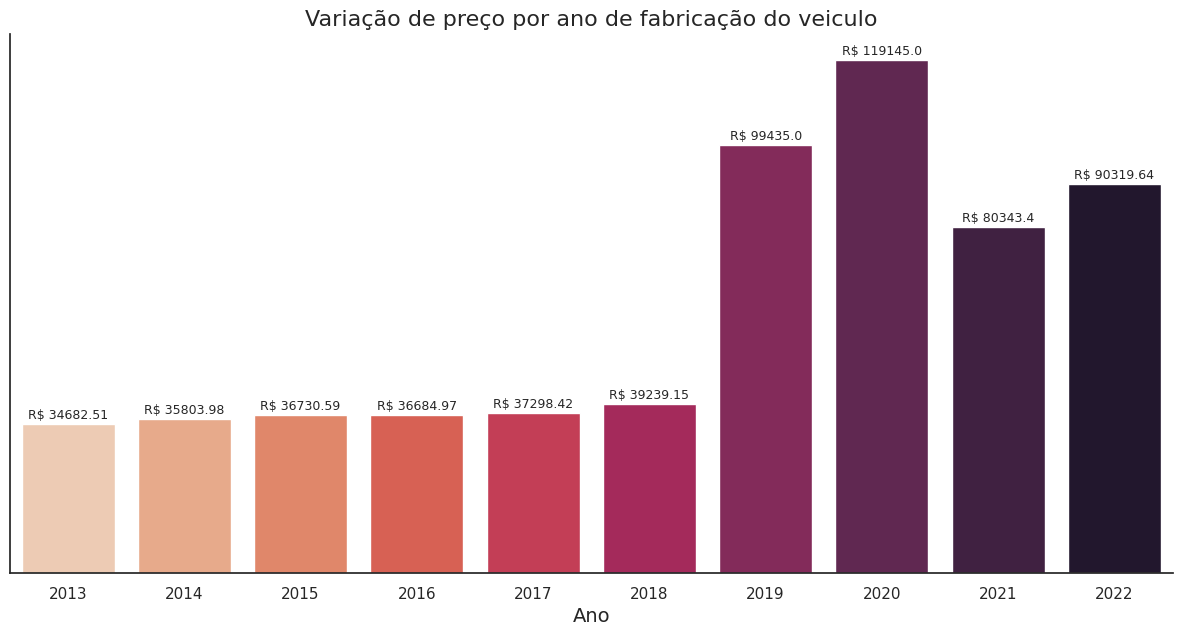

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

def grafico_por_ano(palette):
    filtro_ano = df_shuffle[(df_shuffle['ano'] >= 2013) & (df_shuffle['ano'] <= 2023)]
    preco_por_ano = filtro_ano.groupby('ano')['preco'].mean().round(2).reset_index()
    sns.set_theme(style='white')
    fig, ax = plt.subplots(figsize=(15, 7))
    ax = sns.barplot(data=preco_por_ano, y='preco', x='ano', palette=palette)
    ax.set_title('Variação de preço por ano de fabricação do veiculo', loc='center', fontsize=16)
    ax.set_xlabel('Ano', fontsize='14')
    ax.set_ylabel('')
    for p in ax.patches:
        ax.annotate(f'R$ {p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 6), textcoords='offset points', fontsize='9')
    ax.set(yticklabels=[])
    sns.despine()
    plt.show()

grafico_por_ano('rocket_r')

                  

<font color=green size=4> Observações e hipóteses: </font>

---

Claramente podemos notar um aumento significativo nos preços dos veículos a partir de **2019**, possivelmente em razão da escassez de matérias-primas para sua fabricação e do início da pandemia de COVID-19.



In [28]:
df_shuffle.head(5)

,modelo,combustivel,preco,ano,km,cor,cambio,cidade,airbag motorista,freios ABS,...,"distribuição eletrônica de frenagem,",controle de tração,retrovisores elétricos,piloto automático,Kit Multimídia,bancos de couro,limp. traseiro,longitude,latitude,cilindrada
0,Fiat Grand Siena Tetrafuel,GNV,34900.0,2013,110,Branco,0,Porto Alegre,1,1,...,0,0,0,0,0,0,0,-51.206533,-30.031771,NaN
1,Peugeot 307 Hatch. Presence,Flex,29900.0,2010,132.000,Preto,0,Joinville,0,0,...,0,0,1,0,0,0,1,-48.848675,-26.304497,NaN
2,Fiat Palio ELX,Flex,27990.0,2007,145.000,Preto,0,Guarulhos,1,1,...,0,0,0,0,0,0,1,-46.533347,-23.453758,NaN
3,Volkswagen Up! E-Flex take up!,Flex,38990.0,2014,38.000,Branco,0,Fortaleza,0,0,...,0,0,0,0,0,0,0,-38.542298,-3.716638,NaN
4,Volkswagen Gol TEC City,Flex,34900.0,2013,130.000,Branco,0,Brasília,1,1,...,0,0,0,0,0,0,1,-47.929657,-15.779522,NaN


In [32]:
df_shuffle = df_shuffle.replace('N/D', pd.NA)
df_shuffle['preco'] = pd.to_numeric(df_shuffle['preco'], errors='coerce')
df_shuffle['km'] = pd.to_numeric(df_shuffle['km'], errors='coerce')
correlation_matrix = df_shuffle[['preco', 'ano', 'km', 'cambio',
       'airbag motorista', 'freios ABS', 'airbag passageiro',
       'ar-condicionado', 'direção elétrica',
       'volante com regulagem de altura', 'travas elétricas',
       'cd player com MP3', 'entrada USB', 'vidros elétricos dianteiros',
       'limajuste de alturap. traseiro', 'desemb. traseiro', 'alarme',
       'ajuste de altura',
       'distribuição eletrônica de frenagem,', 'controle de tração',
       'retrovisores elétricos', 'piloto automático', 'Kit Multimídia',
       'bancos de couro', 'limp. traseiro', 'cilindrada']].corr()

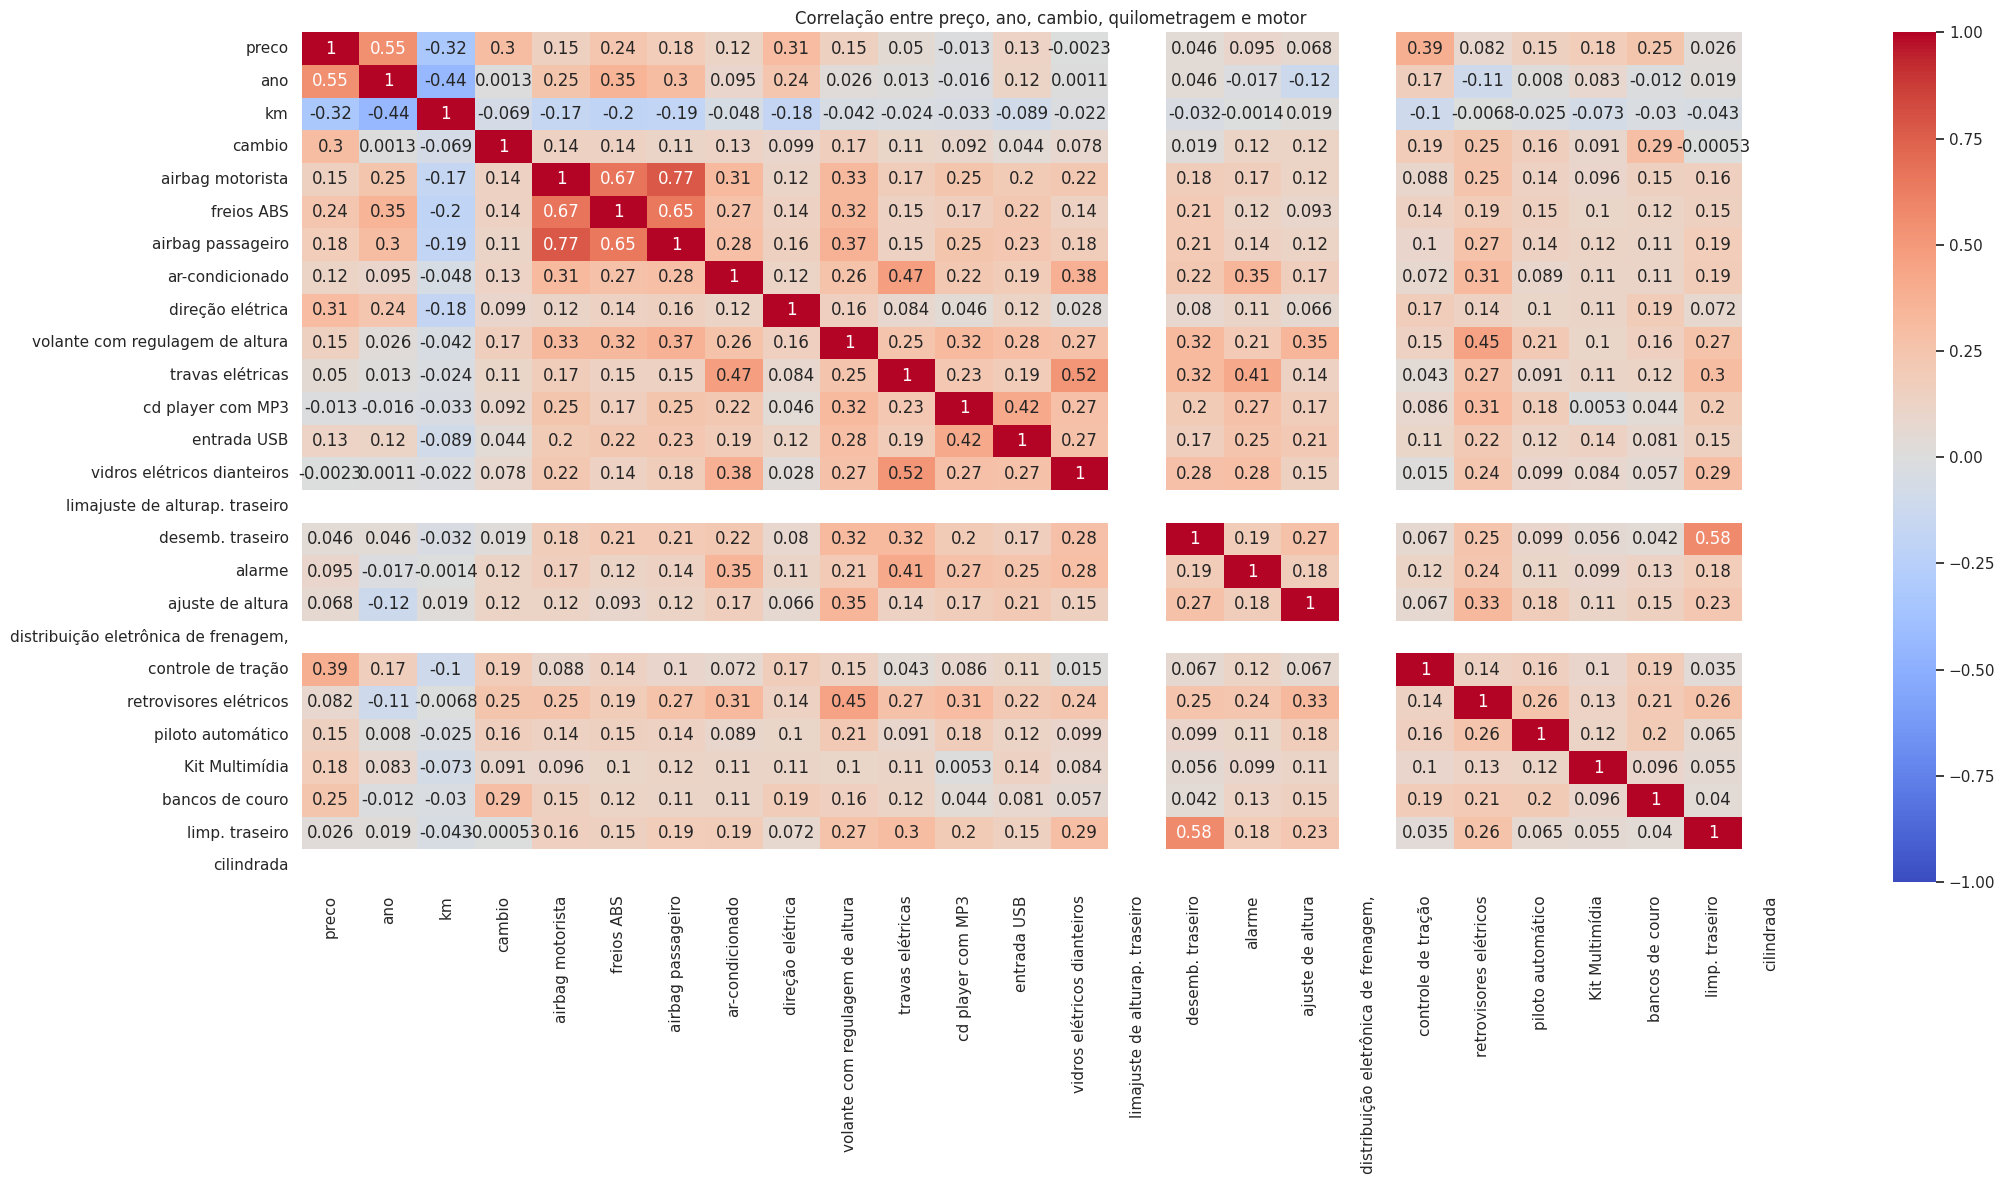

In [33]:
def grafico_corr():
    sns.set(style="white")
    plt.figure(figsize=(22, 12))
    sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, cmap='coolwarm')
    plt.title('Correlação entre preço, ano, cambio, quilometragem e motor')
    plt.tight_layout()
    plt.show()

grafico_corr()

<font color=green size=4> Observações</font>

---

**O que podemos inferir desta matriz de correlação em relação ao preço do veiculo?**

<font color=red size=3> **Resumo:** </font>

**Preço e ano do carro:** Se o ano em que o carro foi fabricado é mais recente, geralmente o preço é mais alto. Isso faz sentido, certo? Carros mais novos costumam ser mais caros. Mas não parece haver uma ligação muito forte entre o preço e a quilometragem ou o tipo de câmbio ou até mesmo o motor.

**Ano do carro e quilometragem:** Carros mais antigos geralmente têm mais quilômetros rodados, o que também faz sentido. No entanto, parece que o ano do carro importa mais para o preço do que a quilometragem. Ou seja, mesmo se um carro for mais antigo, mas tiver rodado poucos quilômetros, ainda pode valer mais.

**Quilometragem e preço:** Embora carros com menos quilômetros tendam a ser mais caros, essa relação não é tão forte. Algumas vezes, mesmo com mais quilômetros, um carro pode ter um preço alto por causa de outros fatores, como ser mais novo.

**Tipo de câmbio e motor:** O tipo de câmbio do carro (se é automático ou manual) parece estar relacionado ao tipo de motor. Isso significa que, dependendo de como o motor é, o carro pode ter um tipo de câmbio específico.

**Tamanho do motor e tipo de câmbio:** A grandeza do motor do carro está ligada ao tipo de câmbio. Isso indica que o tamanho do motor pode influenciar em qual tipo de câmbio funciona melhor no carro.

**Acessórios em veículos:** Um único acessório tem um pequeno efeito no preço do veículo. No entanto, à medida que mais acessórios são adicionados ao veículo, o preço final pode aumenta significativamente.<br>

Acessórios que têm o maior impacto no preço são: **freios ABS, direção elétrica, controle de tração e bancos de couro.**

In [37]:
caracteristicas = [
    'ar-condicionado', 'direção elétrica', 'travas elétricas',
    'cd player com MP3', 'entrada USB', 'vidros elétricos dianteiros',
    'limajuste de alturap. traseiro', 'desemb. traseiro', 'alarme',
    'câmbio automático', 'ajuste de altura',
    'distribuição eletrônica de frenagem,', 'controle de tração',
    'retrovisores elétricos', 'piloto automático', 'Kit Multimídia',
    'bancos de couro', 'limp. traseiro'
]

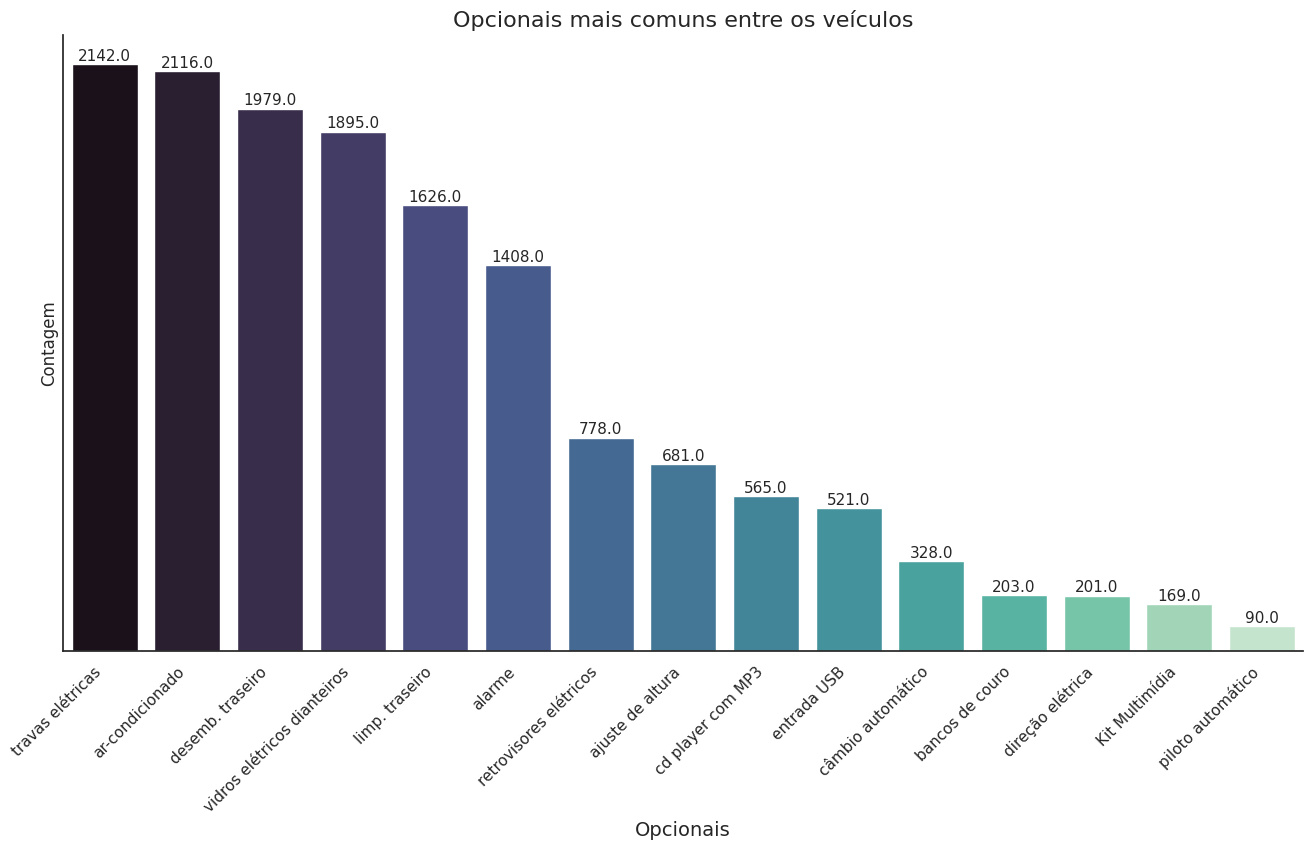

In [38]:
def grafico_caracteristica_comum(qnt):
    caracteristicas = [
    'ar-condicionado', 'direção elétrica', 'travas elétricas',
    'cd player com MP3', 'entrada USB', 'vidros elétricos dianteiros',
    'limajuste de alturap. traseiro', 'desemb. traseiro', 'alarme',
    'câmbio automático', 'ajuste de altura',
    'distribuição eletrônica de frenagem,', 'controle de tração',
    'retrovisores elétricos', 'piloto automático', 'Kit Multimídia',
    'bancos de couro', 'limp. traseiro'
]
    contagem_caracteristicas = df_shuffle[caracteristicas].sum().sort_values(ascending=False).head(qnt)
    df_caracteristicas = pd.DataFrame({'Característica': contagem_caracteristicas.index, 'Contagem': contagem_caracteristicas.values})
    sns.set_theme(style='white')
    fig, ax = plt.subplots(figsize=(16, 8))
    ax = sns.barplot(data=df_caracteristicas, y='Contagem', x='Característica', palette='mako')
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 6), textcoords='offset points', fontsize='11')
    plt.title('Opcionais mais comuns entre os veículos', loc='center', fontsize=16)
    plt.xlabel('Opcionais', fontsize='14')
    plt.yticks([])
    plt.xticks(rotation=45, ha='right')
    ax.set(yticklabels=[])
    sns.despine()

    plt.show()

grafico_caracteristica_comum(15)

<font color=green size=4> Observações</font>

---

<font color=red size=3> **Resumo:** </font>

Esses dados podem ser úteis para entender quais características são mais comuns e desejadas em veículos, bem como quais características são menos frequentes. Eles também podem fornecer informações valiosas para o desenvolvimento e aprimoramento de produtos automotivos, além de orientar estratégias de marketing. Lembre-se de que essas observações são baseadas nos dados fornecidos e podem variar dependendo do contexto e do mercado.

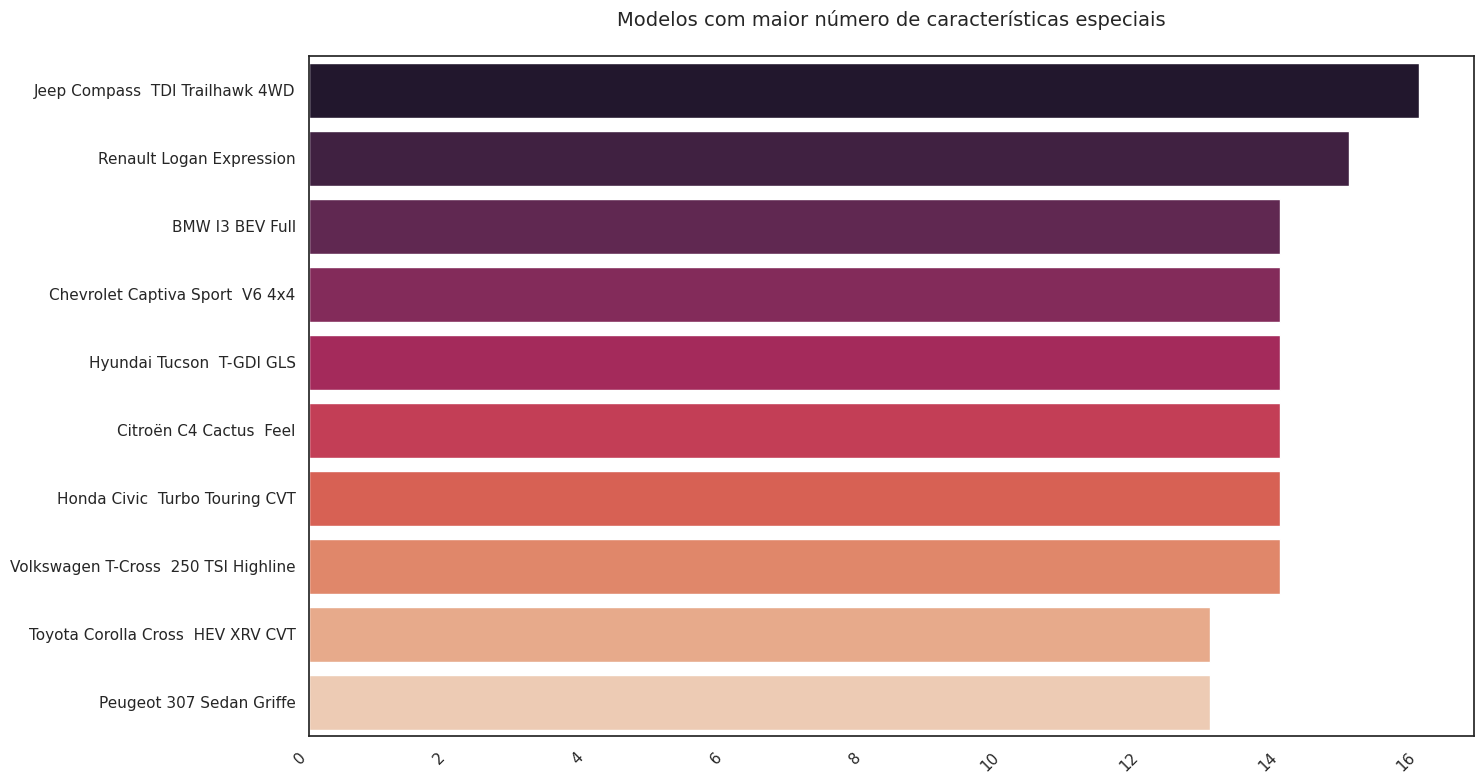

<Figure size 640x480 with 0 Axes>

In [39]:
def maior_numero_caracteristicas():
    df_shuffle['total_caracteristicas'] = df_shuffle[caracteristicas].sum(axis=1)
    top_models = df_shuffle.nlargest(10, 'total_caracteristicas')
    fig, ax = plt.subplots(figsize=(15, 8))
    ax = sns.barplot(x='total_caracteristicas', y='modelo', data=top_models, palette='rocket')
    plt.title('Modelos com maior número de características especiais\n', fontsize='14')
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    sns.despine()

maior_numero_caracteristicas()

<font color=green size=4> Observações </font>

---

<font color=red size=3> **Resumo:** </font>

**Foco no conforto:** Veículos com um alto número de opcionais indicam uma ênfase no conforto do motorista e dos passageiros.
<br>
<br>
**Preço mais elevado:** Geralmente, veículos com um maior número de opcionais tendem a ter um preço mais elevado, o que pode atrair um público que valoriza características adicionais e está disposto a pagar por elas.
<br>
<br>
Veículos com um maior número de opcionais buscam atender a um público que valoriza o conforto, a tecnologia e os recursos adicionais. 
<br>
<br>
Essas características podem influenciar a decisão de compra de consumidores que buscam um veículo mais completo e personalizado para atender às suas necessidades e estilo de vida.

In [40]:
import folium
from folium.plugins import MarkerCluster

def grafico_mapa_cidade():
    contagem_por_cidade = df_shuffle['cidade'].value_counts()

    data_mapa = pd.DataFrame({
        'cidade': contagem_por_cidade.index,
        'quantidade': contagem_por_cidade.values
    })

    latitude_media = df_shuffle['latitude'].mean()
    longitude_media = df_shuffle['longitude'].mean()
    m = folium.Map(location=[latitude_media, longitude_media], zoom_start=4)

    marker_cluster = MarkerCluster().add_to(m)

    for index, row in data_mapa.iterrows():
        cidade = row['cidade']
        quantidade = row['quantidade']
        subset = df_shuffle[df_shuffle['cidade'] == cidade]
        for _, vehicle in subset.iterrows():
            folium.Marker([vehicle['latitude'], vehicle['longitude']], popup=f'{cidade}: {quantidade} veículos').add_to(marker_cluster)

    # Exibindo o mapa
    m.save('mapa_veiculos.html')


<font color=green size=4> Observações </font>

---

<font color=red size=3> **Resumo:** </font>

Ao criar um mapa interativo que destaca as cidades com o maior número de veículos à venda, observamos um padrão interessante. As maiores capitais, como São Paulo, Curitiba e Rio de Janeiro, apresentam uma concentração significativamente maior de veículos disponíveis para venda. Essas cidades metropolitanas e economicamente ativas parecem atrair um maior volume de transações de veículos, o que pode ser reflexo da maior demanda e oferta nesses centros urbanos. A quantidade substancial de veículos à venda nessas cidades sugere uma dinâmica de mercado diferenciada, onde a disponibilidade de veículos parece estar correlacionada com a densidade populacional e a atividade econômica das regiões.

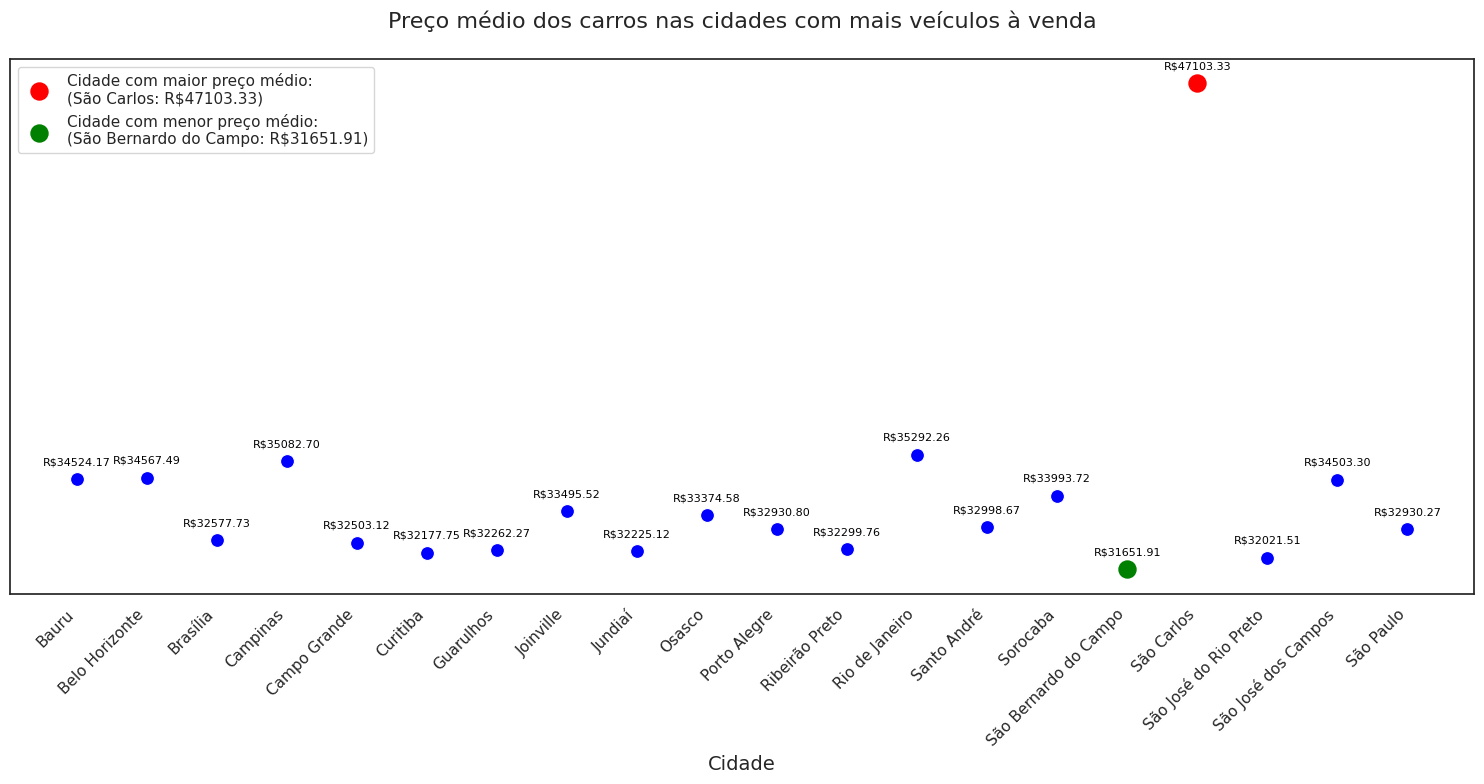

In [41]:
contagem_por_cidade = df_shuffle['cidade'].value_counts()
cidades_mais_veiculos = contagem_por_cidade.nlargest(20).index
data_mais_veiculos = df_shuffle[df_shuffle['cidade'].isin(cidades_mais_veiculos)]
preco_medio_por_cidade = data_mais_veiculos.groupby('cidade')['preco'].mean()

plt.figure(figsize=(15, 8))
ax = sns.scatterplot(x=preco_medio_por_cidade.index, y=preco_medio_por_cidade.values, color='blue', s=100)  # Aumentando o tamanho dos pontos
plt.title('Preço médio dos carros nas cidades com mais veículos à venda\n', fontsize=16)
plt.xlabel('Cidade', fontsize=14)
plt.ylabel('')
ax.set(yticklabels=[])
plt.xticks(rotation=45, ha='right')

cidade_maior_preco = preco_medio_por_cidade.idxmax()
cidade_menor_preco = preco_medio_por_cidade.idxmin()
preco_maior = preco_medio_por_cidade.max()
preco_menor = preco_medio_por_cidade.min()

plt.scatter(cidade_maior_preco, preco_maior, color='red', marker='o', s=150, label=f'Cidade com maior preço médio:\n({cidade_maior_preco}: R${preco_maior:.2f})')
plt.scatter(cidade_menor_preco, preco_menor, color='green', marker='o', s=150, label=f'Cidade com menor preço médio:\n({cidade_menor_preco}: R${preco_menor:.2f})')
plt.legend()

for cidade, preco in zip(preco_medio_por_cidade.index, preco_medio_por_cidade.values):
    plt.annotate(f'R${preco:.2f}', (cidade, preco), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='black')

plt.tight_layout()

plt.show()




<font color=green size=4> Observações </font>

---

<font color=red size=3> **Resumo:** </font>

**Variação de preços por cidade:** O gráfico de pontos revela que as cidades com maior quantidade de veículos à venda não necessariamente têm os preços mais altos. Existem variações notáveis nos preços médios entre diferentes cidades.

**Cidades com preços elevados:** Notamos que cidades como Campinas e Rio de Janeiro possuem preços médios relativamente elevados em comparação com outras cidades do grupo. Isso pode estar relacionado a características econômicas locais e preferências dos consumidores.

**Cidades com preços elevados²:** Creio que isso deve-se ao dataset estar em construção e ter poucos veículos na cidade de Sao Carlos, por enquanto desconsiderar

**Outliers em São Paulo:** São Paulo possui um preço médio ligeiramente acima da média, com alguns valores atípicos mais elevados, possivelmente devido à sua grande diversidade de veículos disponíveis.

In [42]:
def tabela_mais_vendido_cidade(qnt):
    contagem_por_cidade = df_shuffle['cidade'].value_counts()
    top_10_cidades = contagem_por_cidade.nlargest(qnt).index
    data_top_10_cidades = df_shuffle[df_shuffle['cidade'].isin(top_10_cidades)]
    carro_mais_vendido_por_cidade = data_top_10_cidades.groupby('cidade')['modelo'].apply(lambda x: x.value_counts().index[0]).reset_index()
    df_carro_mais_vendido_por_cidade = pd.DataFrame(carro_mais_vendido_por_cidade)
    print(df_carro_mais_vendido_por_cidade.to_string(index=False))

tabela_mais_vendido_cidade(20)

               cidade                        modelo
                Bauru                Volkswagen Gol
       Belo Horizonte           Volkswagen Fox  VHT
             Brasília                Volkswagen Gol
             Campinas                Citroën C3 GLX
         Campo Grande    Chevrolet Classic LS VHC E
             Curitiba            Chevrolet Celta LT
            Guarulhos                Fiat Palio ELX
            Joinville Volkswagen Voyage  Total Flex
              Jundiaí           Chevrolet Agile LTZ
               Osasco                Volkswagen Fox
         Porto Alegre               Fiat Palio Fire
       Ribeirão Preto    Chevrolet Classic LS VHC E
       Rio de Janeiro                 Fiat Siena EL
          Santo André            Chevrolet Celta LT
             Sorocaba           Chevrolet Agile LTZ
São Bernardo do Campo               Fiat Palio Fire
           São Carlos    Renault Sandero Expression
São José do Rio Preto             Ford Fiesta Hatch
  São José d

<font color=green size=4> Observações </font>

---

<font color=red size=3> **Resumo:** </font>

**Custo-benefício:** Nota-se que a seleção de modelos mais populares recai principalmente em veículos fabricados entre os anos de **2010 e 2014**. Esta faixa temporal sugere uma tendência em busca do equilíbrio entre custo e benefício, indicando que carros desse período possuem características atrativas em termos de desempenho, consumo de combustivel, tecnologia e valor.
<br>
<br>
Além disso, merece destaque o fato de que a maioria desses carros pertence à categoria de veículos populares. Ademais, é relevante notar que muitos dos modelos mais vendidos pertencem à categoria de veículos compactos, refletindo a preferência por automóveis que combinam praticidade e eficiência, especialmente em ambientes urbanos congestionados.



In [43]:
import plotly.express as px

def mudanca_opcionais(de, ate):
    colunas_caracteristicas = ['ano', 'freios ABS', 'airbag motorista', 'travas elétricas', 'ar-condicionado', 'vidros elétricos dianteiros', 
                               'alarme', 'câmbio automático', 'bancos de couro', 'controle de tração', ]
    data_caracteristicas = df_shuffle[colunas_caracteristicas]
    data_caracteristicas_filtrado = data_caracteristicas[data_caracteristicas['ano'].between(de, ate)]
    media_caracteristicas_por_ano = data_caracteristicas_filtrado.groupby('ano').mean().reset_index()
    melted_data = media_caracteristicas_por_ano.melt(id_vars='ano', var_name='Característica', value_name='Média')
    fig = px.line(melted_data, x='ano', y='Média', color='Característica', markers=True,
                title='Mudanças nos opcionais dos veículos de 2010 a 2023')

    fig.update_layout(xaxis={'tickangle': -45}, xaxis_title='Ano', yaxis_title='Média das Características')
    fig.show()

mudanca_opcionais(2013, 2023)




<font color=green size=4> Observações </font>

---

<font color=red size=3> **Resumo:** </font>

**Avanços nos recursos de carros populares:** É evidente que a grande maioria dos carros populares contemporâneos está equipada com um recurso essencial para garantir a segurança do motorista e dos passageiros: os **Freios ABS**. Em 2022, impressionantes **82%** dos veículos ofereciam esse recurso fundamental como opcional de série.

No entanto, a incorporação de elementos cruciais, como o **Controle de tração** (presente em apenas **21%** dos automóveis), desempenhando um papel fundamental na prevenção de acidentes, ou mesmo os **Airbags** (disponíveis em apenas 35% dos automóveis), que têm o potencial de evitar tragédias no caso de colisões, ainda é relativamente escassa.



/tmp/ipykernel_87433/2170070719.py:7: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



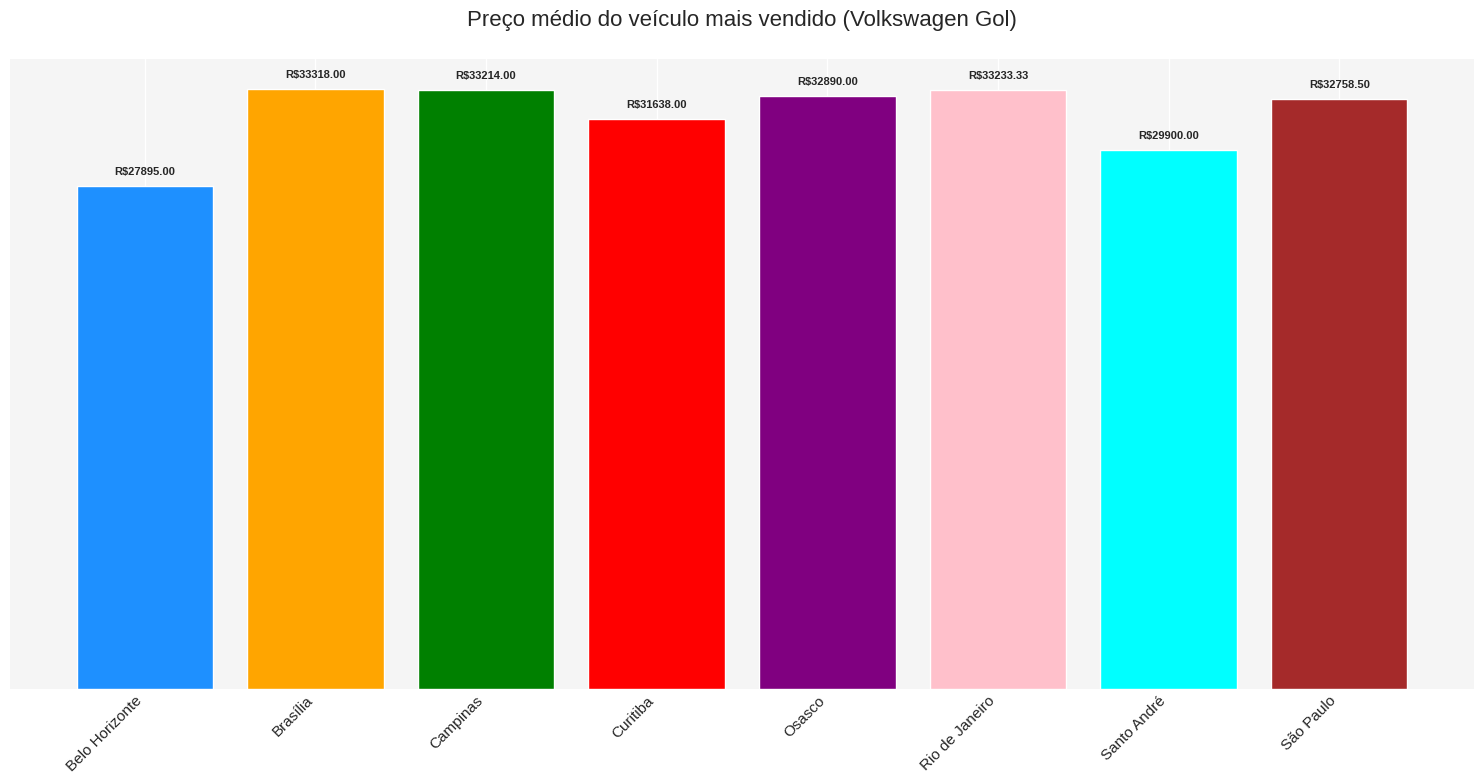

In [45]:
def preco_medio_carro_mais_vendido():
    top_cidades = df_shuffle['cidade'].value_counts().head(10).index
    data_top_cidades = df_shuffle[df_shuffle['cidade'].isin(top_cidades)]
    veiculo_mais_vendido_global = df_shuffle['modelo'].value_counts().idxmax()
    data_veiculo_mais_vendido = data_top_cidades[data_top_cidades['modelo'] == veiculo_mais_vendido_global]
    preco_medio_por_cidade = data_veiculo_mais_vendido.groupby('cidade')['preco'].mean().reset_index()
    plt.style.use('seaborn-darkgrid')
    fig, ax = plt.subplots(figsize=(15, 8))
    cores = ['dodgerblue', 'orange', 'green', 'red', 'purple', 'pink', 'cyan', 'brown', 'gray', 'gold']
    bars = ax.bar(preco_medio_por_cidade['cidade'], preco_medio_por_cidade['preco'], color=cores)
    plt.title(f'Preço médio do veículo mais vendido ({veiculo_mais_vendido_global})\n',
            fontsize=16)
    plt.xticks(rotation=45, ha='right')
    ax.axes.yaxis.set_visible(False)
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 500, f'R${height:.2f}', ha='center', va='bottom', fontsize=8, fontweight='bold')
    ax.set_facecolor('whitesmoke')
    plt.tight_layout()
    plt.show()

preco_medio_carro_mais_vendido()




<font color=green size=4> Observações </font>

---

<font color=red size=3> **Resumo:** </font>

No gráfico, destacam-se as cidades mais favoráveis para adquirir o veículo mais popular do ICarros **(VW Fox 1.0)**:<br><br> **Belo Horizonte, Curitiba e Santo André-SP**. <br><br>Estas cidades apresentam os preços mais atrativos dentre todas as demais.

